In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

from sa_decomp_layer import SADecompLayer

import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
#tf.__version__
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

plt.rcParams['figure.figsize'] = [10,10]
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K


from tensorflow.keras.layers import Layer
from tensorflow.image import flip_up_down, flip_left_right, rot90
from tensorflow.compat.v1 import extract_image_patches
import numpy as np

from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model

from matplotlib.animation import FuncAnimation

from scipy import ndimage, misc
import sys

from scipy.ndimage import rotate

In [31]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.ndimage import rotate
from PIL import Image
import PIL
from matplotlib import cm

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

def load_img(img_path,img_shape, preprocess=True, angle=0):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = Image.open(img_path )  
    img = img.resize((img_rows, img_cols),Image.ANTIALIAS)
  
    white = (255,255,255)
    img = img.rotate(angle, PIL.Image.NEAREST, expand = 1, fillcolor = white)
    img = img.resize((img_rows, img_cols),Image.ANTIALIAS)

    if preprocess:
        img = image.img_to_array(img) 
        img = np.expand_dims(img, axis=0)

        img =  preprocess_input(img)
        return img

    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return np.array(img)

In [52]:
def SADecomp(filters):
    inputs_shape = tf.shape(filters)  
        
    #height, width, n_channel, n_filters = inputs_shape[0], inputs_shape[1], inputs_shape[2], inputs_shape[3]
    k = filters.shape[0]
    #exp_data  = tf.expand_dims(filters[0], 0)


    #patches = extract_image_patches(filters, [1, k, k, 1],  [1, k, k, 1], rates = [1,1,1,1] , padding = 'VALID')
    #print(patches)
    mat_flip_x = np.fliplr(filters)
    mat_flip_y = np.flipud(filters)

    mat_flip_xy =  np.fliplr( np.flipud(filters))

    sum = filters + mat_flip_x + mat_flip_y + mat_flip_xy

    mat_sum_rot_90 = rotate(sum,90)

    #gc.collect()
    #print("mat_sum_rot_90 shape " , mat_sum_rot_90.shape, self._name)
    
    #print("OUT SHAPE," , out.shape)

    return  (sum + mat_sum_rot_90) / 8, filters - ((sum + mat_sum_rot_90) / 8)

MovieWriter imagemagick unavailable; using Pillow instead.
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)
(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)


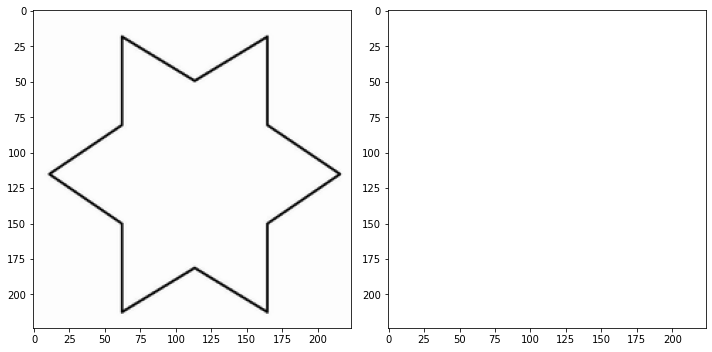

In [53]:


from tkinter import Y

import time
fig, ax = plt.subplots(1,2)
fig.set_tight_layout(True)


def update(i):
    label = 'timestep {0}'.format(i)

    img  = load_img('../images/test_star.jpg', angle=i*10, img_shape=(224,224), preprocess=False)
    
    
    #value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))

    #img = np.array(cv2.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS))

    
    ax[0].imshow(img)
    #print(img.shape)
    #y = np.fft.fft2(img[:,:,1])
    #y = np.fft.fftshift(y)

    '''ax[1].imshow(20*np.log(np.abs(y)), cmap = 'gray_r')

    m = 20*np.log(np.abs(y))
    m = m.reshape(1,224,224,1)
    m  = tf.convert_to_tensor(m)'''
    img = np.array(img, dtype='float')
    img = img.reshape(1, 224, 224, 3)

    #img  = tf.convert_to_tensor(img)

    s, a = SADecomp(img[0])
    #s, a = SADecompLayer(w_size = 3)(img)
    print(img.shape)

    ax[1].imshow(s[0], cmap = 'gray_r')


    return ax



anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)

anim.save('testMov.gif', dpi=80, writer='imagemagick')
